In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("/home/klay/PycharmProjects/LLM-Logic-Eval/dataframes/evaluation_spreadsheet.xlsx")

In [50]:
bqa_mcqa = df.groupby("task_type")["question_id"].count().tolist()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   task_type                350 non-null    object 
 1   logic_type               350 non-null    object 
 2   rule                     350 non-null    object 
 3   sample_id                350 non-null    int64  
 4   question_id              350 non-null    int64  
 5   full_prompt              350 non-null    object 
 6   context                  350 non-null    object 
 7   question                 350 non-null    object 
 8   options                  90 non-null     object 
 9   correct_answer           350 non-null    object 
 10  gemini_2.5_pro_answer    286 non-null    object 
 11  gemini_2.5_flash_answer  286 non-null    object 
 12  chat_gpt_answer          0 non-null      float64
 13  deep_seek_answer         0 non-null      float64
dtypes: float64(2), int64(2), o

In [53]:
bqa_rate = bqa_mcqa[0]
mcqa_rate = bqa_mcqa[1]


<Figure size 1000x600 with 0 Axes>

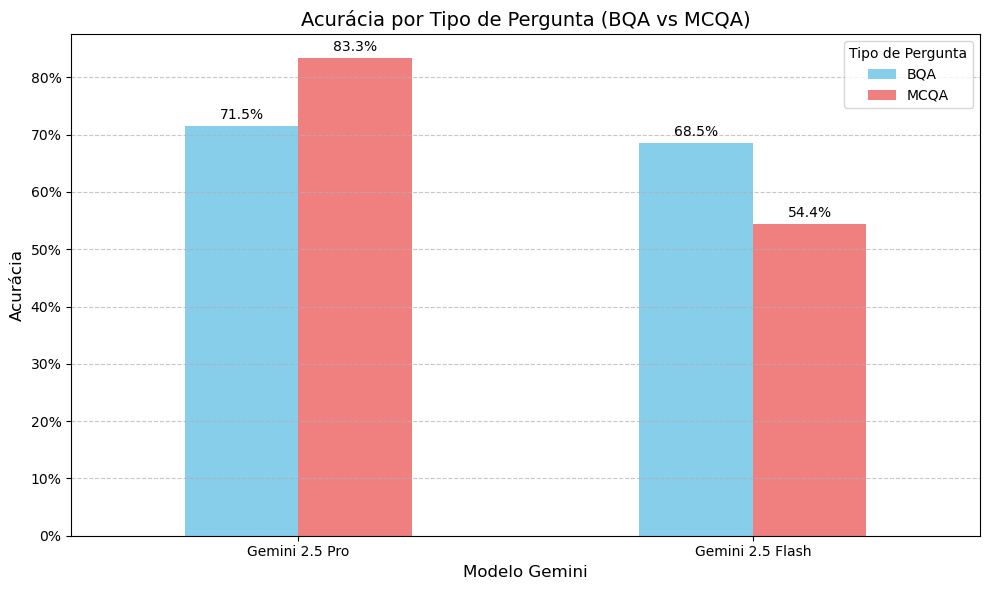

In [64]:
# Primeiro, vamos calcular as contagens totais por tipo de pergunta
total_por_tipo = df.groupby("task_type").size()
total_bqa = total_por_tipo.get("BQA", 0)
total_mcqa = total_por_tipo.get("MCQA", 0)

# Filtrar respostas corretas
right_answer_pro = df[df["correct_answer"] == df["gemini_2.5_pro_answer"]]
right_answer_flash = df[df["correct_answer"] == df["gemini_2.5_flash_answer"]]

# Contar acertos por tipo de pergunta
bqa_mcqa_pro_rates = right_answer_pro.groupby("task_type").size()
bqa_mcqa_flash_rates = right_answer_flash.groupby("task_type").size()

# Calcular acurácia (acertos / total)
acuracia_bqa_pro = bqa_mcqa_pro_rates.get("BQA", 0) / total_bqa
acuracia_mcqa_pro = bqa_mcqa_pro_rates.get("MCQA", 0) / total_mcqa
acuracia_bqa_flash = bqa_mcqa_flash_rates.get("BQA", 0) / total_bqa
acuracia_mcqa_flash = bqa_mcqa_flash_rates.get("MCQA", 0) / total_mcqa

data_acuracia = {
    'BQA': [acuracia_bqa_pro, acuracia_bqa_flash],
    'MCQA': [acuracia_mcqa_pro, acuracia_mcqa_flash]
}

index_nomes = ['Gemini 2.5 Pro', 'Gemini 2.5 Flash']
df_acuracia = pd.DataFrame(data_acuracia, index=index_nomes)

plt.figure(figsize=(10, 6))
ax = df_acuracia.plot(
    kind='bar',
    rot=0,
    figsize=(10, 6),
    color=['skyblue', 'lightcoral']
)

# Adicionar títulos, rótulos e valores nas barras
plt.title('Acurácia por Tipo de Pergunta (BQA vs MCQA)', fontsize=14)
plt.ylabel('Acurácia', fontsize=12)
plt.xlabel('Modelo Gemini', fontsize=12)
plt.legend(title='Tipo de Pergunta', loc='upper right')

# Formatar como porcentagem
for container in ax.containers:
    ax.bar_label(container,
                labels=[f'{val:.1%}' for val in container.datavalues],
                padding=3)

# Formatar eixo Y como porcentagem
import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

[178, 49]
186
